In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (16, 9)

In [18]:
nlp = spacy.load('zh_core_web_lg')

In [23]:
movies = pd.read_csv("./data/movies_prop_df.csv", index_col=0)
movies.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
0,10344754,毒战 毒戰,2012,刚刚结束一次危险任务的津海市缉毒大队队长张雷（孙红雷 饰），在医院意外见到因车祸入院治疗的香...,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,...,0,0,0,0,0,0,0,0,0,0
1,10355621,粉红女郎之爱人快跑,2013,为了泡到一个男朋友，结婚狂（阿雅 饰）碰见魔术师高明（锦荣 饰）后，便告诉对方自己怀了他的孩...,"['喜剧', '爱情']",1826,10,2,3.2,65,...,0,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,一对不食人间烟火的青年男女——彭少文和程雪珂狼狈地逃到余姚县城门口，他们身后有一群凶神恶煞的...,"['动作', '悬疑']",78,10,2,3.2,43,...,0,0,0,0,0,0,0,0,0,0
4,10430281,七个隆咚锵咚锵,2012,韩峰（韩兆 饰）在一天之内丢掉了工作和恋人，一无所有的他陷入了人生的低谷之中。然而，韩峰的运...,"['喜剧', '爱情']",506,10,2,4.9,115,...,0,0,0,0,0,0,0,0,0,0
5,10437802,武当少年 武當少年,2010,主人公翔翔原本是一个天真浪漫，活泼好动的孩子，在一次观看武当武校在台湾的表演后，萌生了赴武当...,"['剧情', '儿童']",68,10,2,6.1,2,...,0,0,0,0,0,0,0,0,0,0


In [24]:
movies[pd.isna(movies.description)]

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2014,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda
296,20284951,遍地黄金,2012,NaN,"['喜剧', '爱情']",255,10,2,5.8,254,...,0,0,0,0,0,0,0,0,0,0
1080,26296026,在勾引中学会爱2,2016,NaN,"['剧情', '爱情', '同性']",2132,10,2,7.9,43,...,0,0,1,0,0,0,0,0,0,0
1760,26869124,最忆是杭州,2016,NaN,['歌舞'],2182,10,2,8.2,38211,...,0,0,1,0,0,0,0,0,0,0
2650,35603036,湾区升明月——2021大湾区中秋电影音乐晚会,2021,NaN,"['音乐', '歌舞', '真人秀']",1425,10,2,7.2,8,...,0,0,0,0,0,0,0,1,0,0


In [25]:
movies = movies[pd.isna(movies.description) == False]
len(movies)

2992

In [14]:
with nlp.disable_pipes():
    doc_vectors = np.array([nlp(desc).vector for desc in movies.description])

doc_vectors.shape

(2992, 300)

In [45]:
# elbow method
scores = []

for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(doc_vectors)
    scores.append(kmeans.inertia_)

<AxesSubplot:>

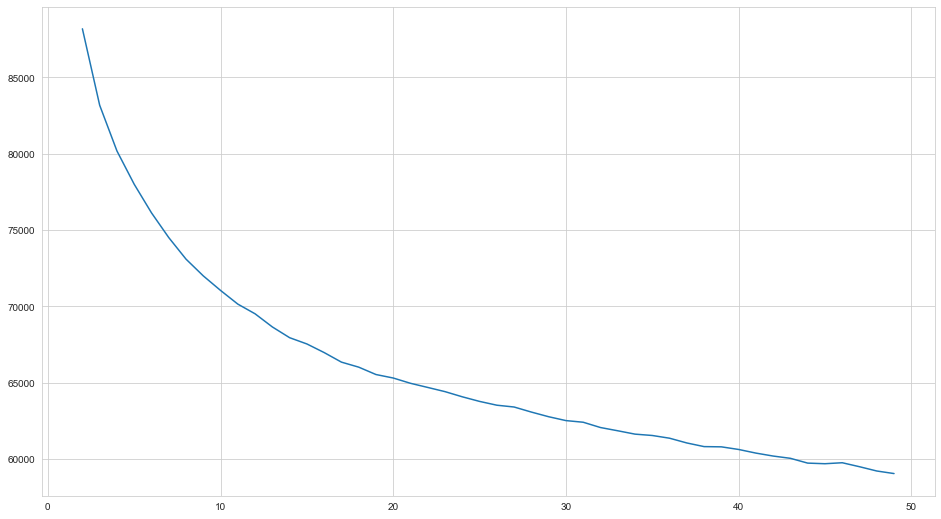

In [46]:
sns.lineplot(y=scores, x=range(2, 50))
# ...? let's go with 20

In [44]:
kmeans = KMeans(n_clusters=20)
clusters = kmeans.fit_predict(doc_vectors)
movies = movies.assign(cluster=clusters)
movies.head()

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda,cluster
0,10344754,毒战 毒戰,2012,刚刚结束一次危险任务的津海市缉毒大队队长张雷（孙红雷 饰），在医院意外见到因车祸入院治疗的香...,"['剧情', '动作', '犯罪']",210072,10,2,7.5,34235,...,0,0,0,0,0,0,0,0,0,8
1,10355621,粉红女郎之爱人快跑,2013,为了泡到一个男朋友，结婚狂（阿雅 饰）碰见魔术师高明（锦荣 饰）后，便告诉对方自己怀了他的孩...,"['喜剧', '爱情']",1826,10,2,3.2,65,...,0,0,0,0,0,0,0,0,0,0
2,10355633,绝命藏宝图,2012,一对不食人间烟火的青年男女——彭少文和程雪珂狼狈地逃到余姚县城门口，他们身后有一群凶神恶煞的...,"['动作', '悬疑']",78,10,2,3.2,43,...,0,0,0,0,0,0,0,0,0,18
4,10430281,七个隆咚锵咚锵,2012,韩峰（韩兆 饰）在一天之内丢掉了工作和恋人，一无所有的他陷入了人生的低谷之中。然而，韩峰的运...,"['喜剧', '爱情']",506,10,2,4.9,115,...,0,0,0,0,0,0,0,0,0,12
5,10437802,武当少年 武當少年,2010,主人公翔翔原本是一个天真浪漫，活泼好动的孩子，在一次观看武当武校在台湾的表演后，萌生了赴武当...,"['剧情', '儿童']",68,10,2,6.1,2,...,0,0,0,0,0,0,0,0,0,4


In [57]:
# representative movies of each cluster?
# https://stackoverflow.com/questions/15705630/get-the-rows-which-have-the-max-value-in-groups-using-groupby
movies[movies.groupby("cluster").ratingCount.transform(max) == movies.ratingCount]

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda,cluster
146,10831445,百鸟朝凤,2013,老一代唢呐艺人焦三爷（陶泽如 饰）是个外冷内热的老人，看起来严肃古板，其实心怀热血。影片表现...,"['剧情', '音乐']",280641,10,2,8.3,4028,...,0,0,0,0,0,0,0,0,0,16
182,11529526,中国合伙人,2013,20世纪80年代，三个怀有热情和梦想的年轻人在高等学府燕京大学的校园内相遇，从此展开了他们长...,['剧情'],598929,10,2,7.6,12496,...,0,0,0,0,0,0,0,0,0,5
240,19931352,唐皇游地府,2012,影片2012年获温哥华国际电影节龙虎奖，2013年入选鹿特丹国际电影节“光明未来”单元和纽约...,"['剧情', '喜剧']",3127,10,2,7.8,1116,...,0,0,0,0,0,0,0,0,0,14
612,25716096,狗十三,2013,13岁的少女李玩，由于父母离异，与爷爷奶奶生活在一起。正处于青春期的她渴望了解、陪伴和爱。在...,"['剧情', '家庭']",472622,10,2,8.2,14884,...,0,0,0,0,0,0,0,0,0,7
911,25921812,驴得水,2016,一群“品行不端”却怀揣教育梦想的大学教师，从大城市来到偏远乡村开办了一所小学校。学校待遇惨淡...,"['剧情', '喜剧']",851820,10,2,8.3,2122,...,0,1,0,0,0,0,0,0,0,17
1029,26266893,流浪地球,2019,近未来，科学家们发现太阳急速衰老膨胀，短时间内包括地球在内的整个太阳系都将被太阳所吞没。为了...,"['科幻', '冒险', '灾难']",1766716,10,2,7.9,2362,...,0,0,0,0,1,0,0,0,0,10
1249,26425063,无双 無雙,2018,身陷囹圄的李问（郭富城 饰）被引渡回港，他原本隶属于一个的跨国假钞制贩组织。该组织曾犯下过多...,"['剧情', '动作', '犯罪', '悬疑']",876740,10,2,8.0,2688,...,0,0,0,1,0,0,0,0,0,8
1538,26752088,我不是药神,2018,普通中年男子程勇（徐峥 饰）经营着一家保健品店，失意又失婚。不速之客吕受益（王传君 饰）的到...,"['剧情', '喜剧']",1926575,10,2,9.0,7333,...,0,0,0,1,0,0,0,0,0,0
1545,26754233,八佰,2020,1937年淞沪会战的最后一役，“八百壮士”奉命坚守上海四行仓库，以少敌多顽强抵抗四天四夜。电...,"['剧情', '历史', '战争']",761288,10,2,7.5,13562,...,0,0,0,0,0,1,0,0,1,13
1616,26794435,哪吒之魔童降世,2019,天地灵气孕育出一颗能量巨大的混元珠，元始天尊将混元珠提炼成灵珠和魔丸，灵珠投胎为人，助周伐纣...,"['剧情', '喜剧', '动画', '奇幻']",1714973,10,2,8.4,5301,...,0,0,0,0,1,0,0,0,0,11


In [70]:
# which cluster correlates the most with propaganda?
for k in range(0, 20):
    cluster = movies[movies.cluster == k]
    print(f"Cluster {k}: {100 * np.sum(cluster.dPropaganda) / len(cluster)}%")

Cluster 0: 1.5384615384615385%
Cluster 1: 4.964539007092198%
Cluster 2: 1.3986013986013985%
Cluster 3: 0.6666666666666666%
Cluster 4: 1.2422360248447204%
Cluster 5: 26.08695652173913%
Cluster 6: 84.21052631578948%
Cluster 7: 3.7313432835820897%
Cluster 8: 8.433734939759036%
Cluster 9: 1.10803324099723%
Cluster 10: 9.433962264150944%
Cluster 11: 2.0408163265306123%
Cluster 12: 3.5714285714285716%
Cluster 13: 17.24137931034483%
Cluster 14: 0.0%
Cluster 15: 68.42105263157895%
Cluster 16: 7.43801652892562%
Cluster 17: 9.027777777777779%
Cluster 18: 6.896551724137931%
Cluster 19: 3.8461538461538463%


In [71]:
# checkout clusters 15 and 6
movies[movies.cluster == 15]

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda,cluster
187,11589786,非常营救,2012,1932年4月底，日寇在上海虹口公园举行淞沪战争胜利祝捷大会，谁知大韩民国临时警务总长金九策...,"['剧情', '悬疑']",650,10,2,5.4,4,...,0,0,0,0,0,0,0,0,1,15
214,11627074,扎西1935,2012,《扎西1935》是一部为迎接党的十八大胜利召开，由中共云南省委宣传部、昭通市委宣传部、中国电...,"['剧情', '历史', '战争']",99,10,2,6.3,4,...,0,0,0,0,0,0,0,0,1,15
262,19967789,刘老庄八十二壮士,2013,1943年3月18日，新四军第3师第7旅第19团第4连82位勇士，在江苏淮阴刘老庄的一场阻击...,"['历史', '战争']",871,10,2,5.3,4,...,0,0,0,0,0,0,0,0,1,15
394,21359495,红财神,2013,故事讲述1946年国民党对太行山区进行残酷的经济封锁。我军高层一对一安排根据地供销社主任毛承...,['剧情'],160,10,2,6.5,22,...,0,0,0,0,0,0,0,0,1,15
438,23115889,骇客,2012,本片讲述网络警察安威在调查一起死亡案件时，发现此案与网络诈骗罪犯李吉有关联，随着调查的深入，...,"['剧情', '犯罪']",113,10,2,3.1,27,...,0,0,0,0,0,0,0,0,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906,5343383,惊沙,2011,1936年6月，红军长征胜利后，红四方面军主力奉中央军委命令西渡黄河作战，这就是赫赫有名的西...,"['历史', '战争']",952,10,2,6.5,110,...,0,0,0,0,0,0,0,0,1,15
2980,5997856,第一大总统,2011,1912年，孙中山（邱心志 饰）当选南京国民政府临时大总统。坐镇北平的袁世凯（张秋歌 饰）设...,"['剧情', '传记', '历史']",823,10,2,4.8,6,...,0,0,0,0,0,0,0,0,0,15
2992,6041191,听风者,2012,1949年，新中国建立之初。江山初定，百废待兴，和平的表象下没有硝烟的战争早已拉开序幕。败逃...,"['剧情', '悬疑']",194279,10,2,6.9,3082,...,0,0,0,0,0,0,0,0,1,15
2995,6041200,钱学森,2012,上世纪四十年代，加州理工学院终身教授钱学森（陈坤 饰）因为美国兴起的反共言论而备受打击。他的...,['传记'],27316,10,2,7.3,645,...,0,0,0,0,0,0,0,0,1,15


In [72]:
movies[movies.cluster == 6]

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda,cluster
101,10738246,大碗茶,2012,影片是著名编剧马泉来以上世纪七、八十年代前门大碗茶创业故事为原型创作的。讲述了改革开放初期街...,['剧情'],438,10,2,7.2,27,...,0,0,0,0,0,0,0,0,1,6
106,10746136,忠诚与背叛,2012,"一九二七年四月,中华大地腥风血雨，背叛革命的蒋介石勾结帝国主义势力，大肆屠杀共产党人和无辜民...","['剧情', '历史']",1338,10,2,4.9,15,...,0,0,0,0,0,0,0,0,1,6
150,10833850,边防站,2012,影片讲述了毗邻“金三角”的祖国西南边陲，公安边防工作站站长蔡斯文带领官兵与贩毒分子展开惊心动...,['剧情'],111,10,2,6.3,68,...,0,0,0,0,0,0,0,0,1,6
203,11615437,红星闪耀,2012,《红星闪耀》反映的是邓小平在中央苏区由于贯彻毛泽东的军事路线，遭到批判。在担任《红星报》主编...,['剧情'],83,10,2,4.2,58,...,0,0,0,0,0,0,0,0,1,6
211,11627061,索道医生,2012,《索道医生》以全国道德模范、福贡县石月亮乡乡村医生邓前堆为原型。邓前堆冒生命危险溜索过江往返...,['剧情'],96,10,2,7.8,63,...,0,0,0,0,0,0,0,0,1,6
216,11627083,南平红荔,2012,电影《南平红荔》是一部法院题材的主旋律作品。根据福建南平市延平区法院少年法庭庭长詹红荔先进事...,['剧情'],216,10,2,6.1,23,...,0,0,0,0,0,0,0,0,0,6
219,11632451,咱们的工会主席,2012,电影《工会主席》，是以英格索兰（桂林）工具有限公司工会主席王远文为原型创作的一部影片。王远文...,['剧情'],54,10,2,5.5,20,...,0,0,0,0,0,0,0,0,1,6
257,19965216,国徽,2012,电影《国徽》是第一部全景展示新中国 国徽诞生全历程的3D故事片，影片采用 双线并进的叙述方式...,['剧情'],181,10,2,6.1,7,...,0,0,0,0,0,0,0,0,1,6
300,20376613,有事找王江,2012,电影《有事找王江》由公安部宣传局、黑龙江省公安厅和大连恒光文化传媒有限公司联合出品，由佳木斯...,['剧情'],77,10,2,7.3,71,...,0,0,0,0,0,0,0,0,1,6
412,21941127,画框里的女人,2017,以清朝乾隆年间，法国传教士画家王志诚在宫中为皇后画肖像画为主线，全景式的展现了清朝宫廷内部权...,['剧情'],1458,10,2,3.8,28,...,0,0,1,0,0,0,0,0,0,6


In [74]:
# did I miss any?
movies[(movies.cluster == 15) & (movies.dPropaganda == 0)]

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda,cluster
489,24527030,弹无虚发之死亡之海,2012,敦煌以西黄沙千里，历来为生命禁区号称“死亡之海”，外国探险家与沙漠土匪勾结走私大量莫高窟珍宝...,"['剧情', '动作']",56,10,2,5.7,28,...,0,0,0,0,0,0,0,0,0,15
591,25702362,轰天雷凌振,2013,大宋年间，第一火炮专家凌振，擅长使用火药及研制各种火炮，梁山好汉与奸臣高俅麾下展开一场大战，...,"['动作', '古装']",79,10,2,4.4,100,...,0,0,0,0,0,0,0,0,0,15
954,25980221,夫妻合伙人,2014,该片讲述了海外上游游戏公司准备并购下游接包公司。由七零后北漂小夫妻伊兰和唐晓辉经营的‘同心动...,['剧情'],118,10,2,4.0,57,...,0,0,0,0,0,0,0,0,0,15
1218,26385746,荡寇风云,2017,影片讲述了一代名将戚继光南征倭寇还沿海太平的传奇故事，明中期嘉靖年间，地方官府腐败、明兵军心...,"['传记', '动作', '历史', '战争', '古装']",20017,10,2,6.0,1586,...,0,0,1,0,0,0,0,0,0,15
1260,26426194,巨齿鲨 The Meg,2018,一项由中国主导的国际科研项目，正在马里亚纳海沟深处进行时，遭遇未知生物攻击，科研人员被困海底...,"['动作', '科幻', '惊悚']",204098,10,2,5.7,109,...,0,0,0,1,0,0,0,0,0,15
1322,26596357,土地志,2015,凤凰台的支书、村主任马天贵与他的房地产开发商弟弟马天元，利用权钱交易，强迫凤凰台村村民进行私...,['剧情'],472,10,2,8.3,45,...,1,0,0,0,0,0,0,0,0,15
1607,26786669,决战中途岛 Midway,2019,电影讲述的是第二次世界大战太平洋战争重要转折点——中途岛海战：经此一役，日本海军受到“降维打...,"['剧情', '历史', '战争']",223049,10,2,7.5,6038,...,0,0,0,0,1,0,0,0,0,15
1671,26823157,仙班校园2,2016,2016年全民运动会火炬传递过程中，反派夜游神抢走火炬圣火，并藏匿于仙魔友好学院中。希腊神宙...,"['喜剧', '动作']",211,10,2,3.4,5,...,0,1,0,0,0,0,0,0,0,15
1773,26873799,龙之战,2017,1885年，法军进攻越南凉山，驻守清军不战而退，清朝政府的统治地位遭到威胁，慈禧召集众臣商讨...,"['动作', '历史', '战争']",8548,10,2,6.4,45,...,0,0,1,0,0,0,0,0,0,15
1827,26915543,恶意,2016,《恶意》北京电影学院2016届毕业联合作业\n\n幼儿接连失踪被害，警方线索了了，无从下手。...,"['犯罪', '悬疑', '惊悚']",409,10,2,6.4,61,...,0,1,0,0,0,0,0,0,0,15


In [81]:
movies[(movies.cluster == 6) & (movies.dPropaganda == 0)]

,id,name,year,description,genre,ratingCount,bestRating,worstRating,ratingValue,directorMaxEffect,...,y2015,y2016,y2017,y2018,y2019,y2020,y2021,y2022,dPropaganda,cluster
216,11627083,南平红荔,2012,电影《南平红荔》是一部法院题材的主旋律作品。根据福建南平市延平区法院少年法庭庭长詹红荔先进事...,['剧情'],216,10,2,6.1,23,...,0,0,0,0,0,0,0,0,0,6
412,21941127,画框里的女人,2017,以清朝乾隆年间，法国传教士画家王志诚在宫中为皇后画肖像画为主线，全景式的展现了清朝宫廷内部权...,['剧情'],1458,10,2,3.8,28,...,0,0,1,0,0,0,0,0,0,6
1124,26323543,怪医唐慎微,2014,唐慎微是成都人，为北宋著名医药学家，他在多年广泛采集的基础上，于1082年编成《经史证类备急...,"['剧情', '传记', '历史']",382,10,2,6.2,22,...,0,0,0,0,0,0,0,0,0,6
1152,26341042,顾景舟,2015,该电影将全景重现顾景舟在民国时期的生活、创作画面，通过复原当年蜀山老街上紫砂陶工业的盛况，特...,['传记'],151,10,2,5.7,1,...,1,0,0,0,0,0,0,0,0,6
1403,26649225,咖啡风暴 Caffè,2016,电影《咖啡风暴》在中国、意大利、比利时取景拍摄，讲述了三段感人至深的故事，展现了不同文化背景...,['剧情'],410,10,2,5.5,86,...,0,1,0,0,0,0,0,0,0,6
1696,26834249,擎天无影脚黄麒英,2016,武术大师黄飞鸿之父黄麒英，这位有着深厚武学功底的中医医师乐善好施、一腔热血，在人生历经曲折后...,"['剧情', '动作', '武侠']",507,10,2,3.8,32,...,0,1,0,0,0,0,0,0,0,6
2250,30317706,特警队,2019,《特警队》是华语内地警匪片中第一部完全以特警为主角的电影，影片以真实的特警精英队伍“蓝剑突击...,['动作'],25939,10,2,5.0,880,...,0,0,0,0,1,0,0,0,0,6
2321,30419744,春江水暖,2019,六百年前元朝画家黄公望先生以富春江两岸风貌画下《富春山居图》，为迎接2022年亚运会，富阳正...,"['剧情', '家庭']",25366,10,2,7.3,1165,...,0,0,0,0,1,0,0,0,0,6
3012,6124051,月光恋,2012,通过主要人物阿姚和阿坤的情感纠葛，交替展现海峡两岸两代客家人不同的命运，其中浸透了老一辈客家...,"['剧情', '爱情']",99,10,2,6.6,2,...,0,0,0,0,0,0,0,0,0,6


In [ ]:
missed = [
    26961119,
    30221757,
    30295905,
    30373723,
    30413195,
    35172696,

    11627083,
    30317706,
]